In [20]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns 

In [21]:
day_1 = pd.read_csv(r"data/prices_round_4_day_1.csv", sep = ";")
day_2 = pd.read_csv(r"data/prices_round_4_day_2.csv", sep = ";")
day_3 = pd.read_csv(r"data/prices_round_4_day_3.csv", sep = ";")
day_3.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,3,0,PICNIC_BASKET,73997.0,2.0,73996.0,14.0,73994.0,30.0,74008.0,2.0,74009.0,14.0,74010.0,30.0,74002.5,0.0
1,3,0,DOLPHIN_SIGHTINGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3094.0,0.0
2,3,0,BERRIES,3905.0,14.0,3904.0,52.0,NaN,NaN,3912.0,14.0,3913.0,52.0,NaN,NaN,3908.5,0.0
3,3,0,BAGUETTE,12381.0,47.0,12380.0,56.0,NaN,NaN,12383.0,103.0,NaN,NaN,NaN,NaN,12382.0,0.0
4,3,0,PEARLS,9996.0,2.0,9995.0,25.0,NaN,NaN,10004.0,2.0,10005.0,25.0,NaN,NaN,10000.0,0.0


In [22]:
df = day_2

# Pivot the data to get a separate column for each product's mid price
df_pivoted = df.pivot(index='timestamp', columns='product', values='mid_price')
df_pivoted_change = df_pivoted.pct_change().dropna()

df_pivoted

product,BAGUETTE,BANANAS,BERRIES,COCONUTS,DIP,DIVING_GEAR,DOLPHIN_SIGHTINGS,PEARLS,PICNIC_BASKET,PINA_COLADAS,UKULELE
timestamp,,,,,,,,,,,
0,12256.0,4824.5,3850.5,7924.0,7094.5,99192.5,3076.0,10001.0,74309.5,14851.5,20964.5
100,12255.0,4824.0,3850.5,7925.5,7093.5,99199.0,3076.0,9996.5,74319.0,14854.5,20965.0
200,12254.0,4827.5,3852.5,7925.0,7093.0,99195.5,3076.0,9997.0,74312.5,14854.5,20965.5
300,12255.0,4825.0,3851.5,7926.5,7093.5,99194.0,3076.0,9997.0,74293.5,14859.5,20958.5
400,12251.5,4822.0,3852.0,7925.5,7094.5,99195.0,3076.0,10000.0,74292.0,14856.5,20957.0
...,...,...,...,...,...,...,...,...,...,...,...
999500,12379.0,4794.5,3905.5,7910.0,7017.5,100174.5,3094.0,10000.0,73993.0,14843.5,20702.0
999600,12379.0,4792.5,3907.5,7910.5,7017.0,100171.0,3094.0,9998.5,73994.0,14845.5,20704.5
999700,12381.5,4795.5,3907.5,7911.5,7018.0,100179.5,3094.0,9996.5,74009.0,14845.5,20702.5


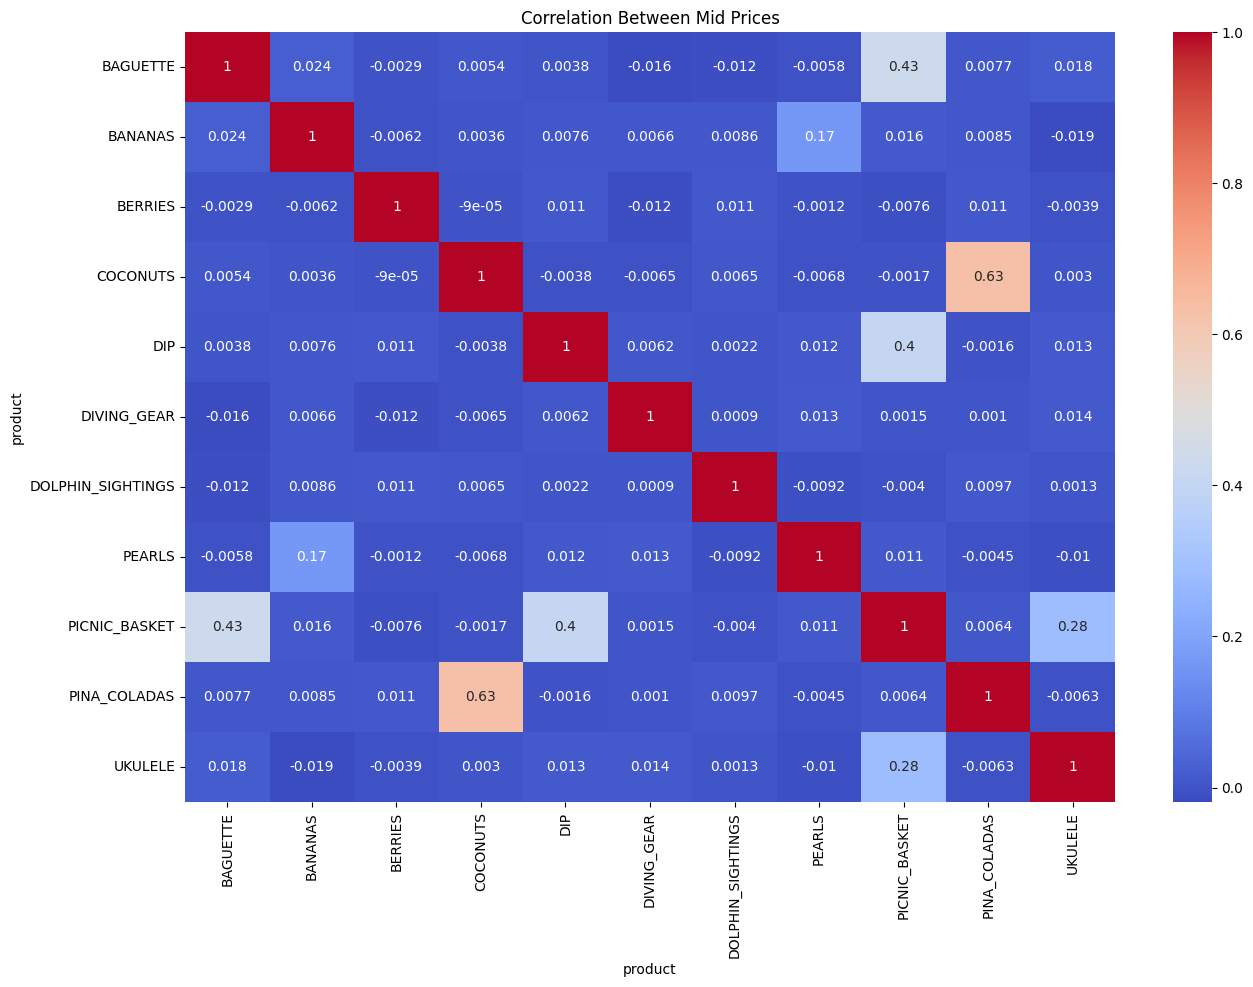

In [23]:
# Calculate the correlation matrix between products
corr_matrix = df_pivoted_change.corr()
plt.figure(figsize = (15, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Between Mid Prices')

plt.show()

In [24]:
df_pivoted["E(PICNIC_BASKET)"] = df_pivoted.BAGUETTE*2 + df_pivoted.DIP*4 + df_pivoted.UKULELE

Text(0.5, 1.0, 'Mispricing in ETF')

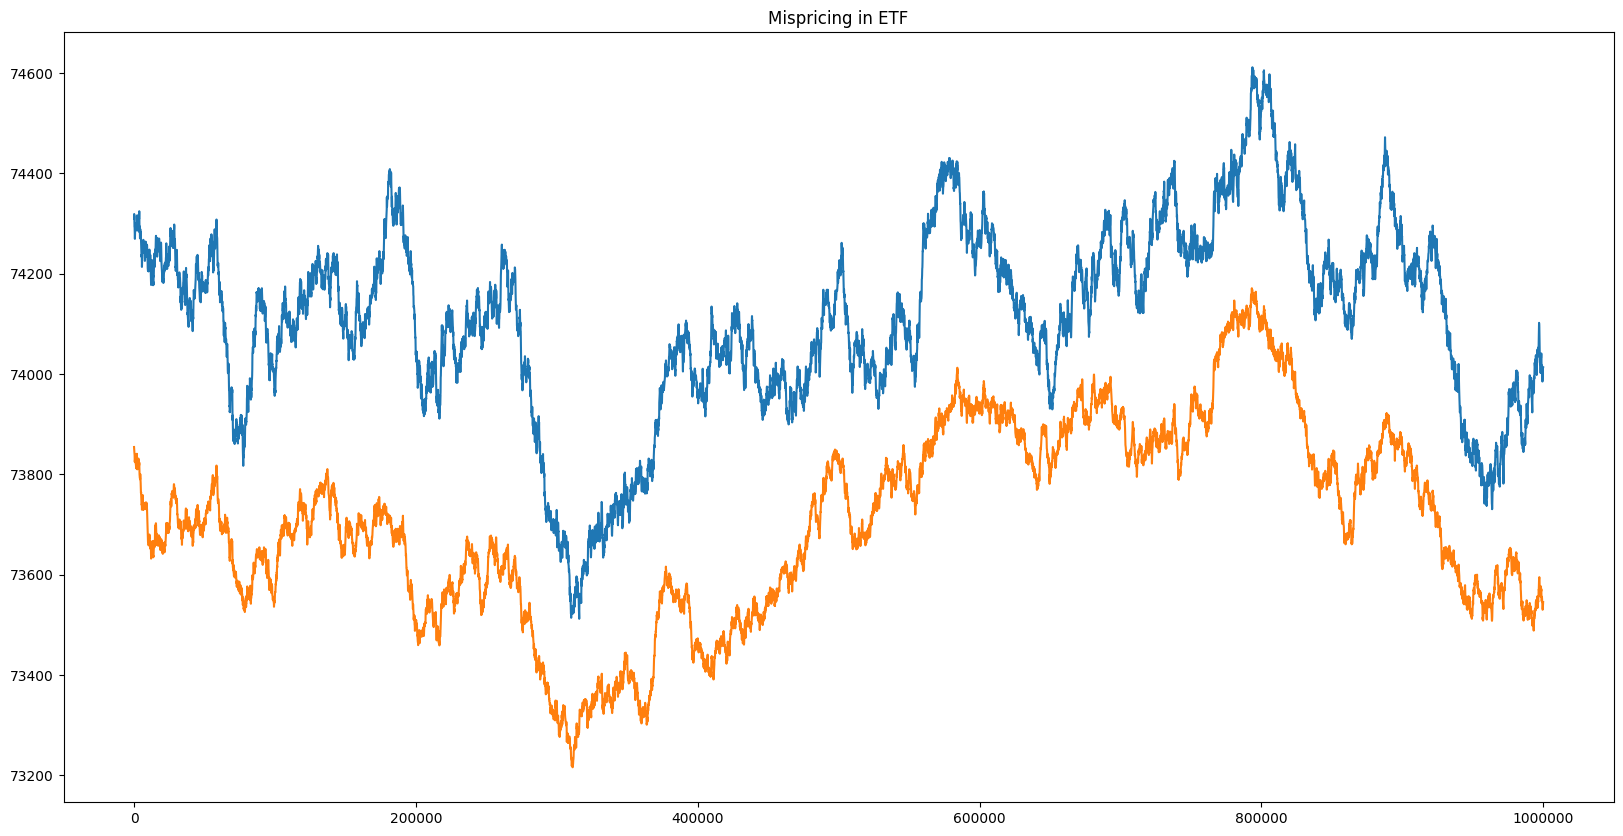

In [25]:
plt.figure(figsize = (20,10))
plt.ticklabel_format(style='plain', useOffset=False)
ETF = df_pivoted[["PICNIC_BASKET", "E(PICNIC_BASKET)"]]
plt.plot(ETF)
plt.title("Mispricing in ETF")

In [26]:
ETF["Misprice"] = ETF["PICNIC_BASKET"] - ETF["E(PICNIC_BASKET)"]
ETF["Misprice"].mean()

C:\Users\lhott\AppData\Local\Temp\ipykernel_15640\1173450902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ETF["Misprice"] = ETF["PICNIC_BASKET"] - ETF["E(PICNIC_BASKET)"]


403.26115

In [27]:
# Calculate the total bid volume and ask volume for each product
product_volumes = df.groupby("product").agg({
    "bid_volume_1": "sum", "bid_volume_2": "sum", "bid_volume_3": "sum",
    "ask_volume_1": "sum", "ask_volume_2": "sum", "ask_volume_3": "sum"
})

# Calculate the total volume for each product by summing the bid and ask volumes
product_volumes["total_volume"] = product_volumes.sum(axis=1)

filtered_df = product_volumes[product_volumes.index.isin(["BAGUETTE", "DIP", "UKULELE", "PICNIC_BASKET"])].reset_index()
filtered_df

,product,bid_volume_1,bid_volume_2,bid_volume_3,ask_volume_1,ask_volume_2,ask_volume_3,total_volume
0,BAGUETTE,726296.0,472404.0,0.0,737282.0,457599.0,4048.0,2397629.0
1,DIP,1674552.0,577968.0,0.0,1690488.0,557761.0,3892.0,4504661.0
2,PICNIC_BASKET,59747.0,168834.0,149348.0,59999.0,169208.0,149480.0,756616.0
3,UKULELE,499137.0,125782.0,0.0,496530.0,128311.0,0.0,1249760.0


Note particularly low volume of ETF 